In [27]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import yaml
import glob
import plot_helper

In [47]:
def glob_grid_experiments(directory):
    data = dict()
    for f in glob.glob(f"{directory}/*/*/latent-representation.npy"):
        dir_path = "/".join(f.split("/")[:-1])
        with open(f"{dir_path}/summary.yml", "r") as fh:
            summary = yaml.safe_load(fh)
            key = "%s--%s--%s" % (summary["model"], summary["strategy"], str(summary["M"]))

            data[key] = np.load(f)
    return data
    
data = glob_grid_experiments("../artifacts-server/experiment-2d-mnist/")

In [48]:
len((data).keys())

21

In [51]:
def plot(ax, d, cm=plt.get_cmap('gist_rainbow')):
    labels = d[:, 0] 
    mu = d[:, 1:3]
    cov = d[:, 3:].reshape((-1, 2, 2))


    for i in range(10):
        ix = np.argwhere(labels == i)
        ix = ix.reshape(-1)
        plt.scatter(mu[ix, 0], mu[ix, 1], color=cm(i/10), alpha=0.0, label=i)

        for j in range(ix.shape[0]):
            ij = ix[j]
            plot_helper.plot_ellipse(ax, mu[ij,:], cov[ij, :, :], edgecolor=cm(i/10))


In [52]:
def alias(n):
    if n[:3] == "seq":
        return n.replace("seq", "algo1")
    elif n[:3] == "alt":
        k = n.split("/")[1].split("|")[0].split(":")[1]
        return f"algo2/k:{k}" 
    else:
        return n

In [53]:
alias("seq/d:20|e:1"), alias("alt/e:5|d:1")

('algo1/d:20|e:1', 'algo2/k:5')

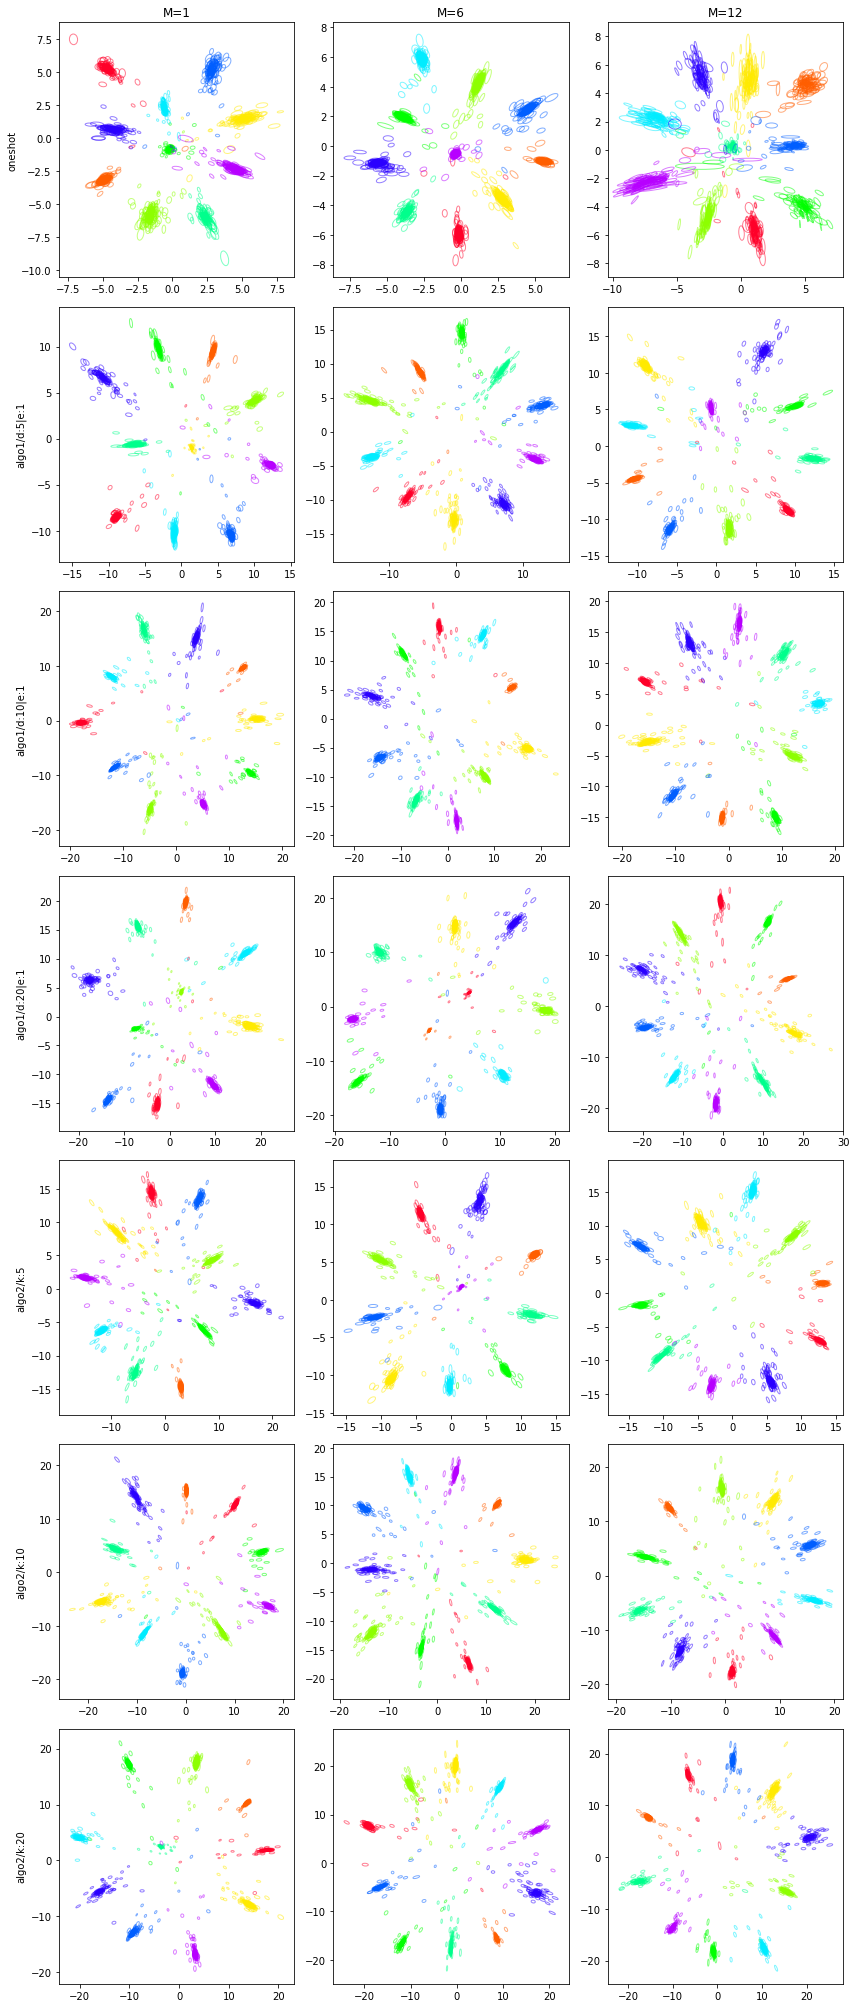

In [59]:
model = "vdb_fcov/e1:1024|e2:1024|z:2"
strategies = [
    "oneshot", "seq/d:5|e:1", "seq/d:10|e:1",
    "seq/d:20|e:1", "alt/e:5|d:1", "alt/e:10|d:1", "alt/e:20|d:1"
]
M = [1, 6, 12]

def plot_grid(model, strategies, M):
    total_strategies = len(strategies)
    total_M = len(M)
    plt.figure(figsize=(4*total_M, 4*total_strategies))
    for i, s in enumerate(strategies):
        for j, m in enumerate(M):
            ax = plt.subplot(total_strategies, total_M, i*total_M + j+1)
            if i == 0:
                plt.title(f"M={m}")
            if j == 0:
                plt.ylabel(alias(s))
            plot(ax, data[f"{model}--{s}--{m}"])   
    plt.tight_layout()
    plt.savefig(f"./2d-latent.png")
plot_grid(model, strategies, M)